#Cora dataset:

The Cora dataset is a widely used benchmark dataset in the field of graph-based machine learning, particularly for tasks like node classification on citation networks.

Here are the key characteristics of the Cora dataset:

1. **Content**: It consists of a collection of
scientific publications (papers).
2. **Size**: There are 2708 scientific publications in the dataset.
3. **Classification**: Each publication is categorized into one of seven different classes. These classes typically represent academic subject areas or research topics.
4. **Citation Network**: The dataset includes a citation network, representing which papers cite which other papers. This network contains 5429 links (citations) between the publications.
5. **Paper Representation**: Each paper is described by a binary word vector (0/1-valued). This vector indicates the presence (1) or absence (0) of a specific word from a dictionary of words relevant to the dataset. This serves as a feature representation for each paper, capturing its content based on keywords.

In essence, the Cora dataset provides a network where nodes are papers, edges are citations, and each node has features (word vectors) and a label (subject class). This structure makes it suitable for tasks where you want to predict the class of a paper based on its content and its position within the citation network.

In [ ]:
import pandas as pd
import networkx as nx
import numpy as np

# Load the edge list from the cora.cites file.
# The file is tab-separated and has no header.
# We name the columns 'target' and 'source' to represent citations.
edges = pd.read_csv("cora.cites", sep='\t', header=None, names=['target', 'source'])

#Load the node content from the cora.content file.
# This file is also tab-separated and has no header.
# The first column is the node ID, the middle columns are features, and the last is the label.
nodes = pd.read_csv("cora.content", sep='\t', header=None)

# Convert node IDs in both DataFrames to strings for consistency.
# This prevents potential issues when using them as graph node identifiers.
edges['source'] = edges['source'].astype(str)
edges['target'] = edges['target'].astype(str)
nodes[0] = nodes[0].astype(str) # Column 0 contains the node IDs in the nodes DataFrame


# Create a directed graph (DiGraph) from the edges DataFrame.
# The 'source' column indicates the citing paper, and the 'target' column is the cited paper.
G = nx.from_pandas_edgelist(edges, source='source', target='target', create_using=nx.DiGraph())

# Add node features and labels
# Iterate through each row in the nodes DataFrame.
for _, row in nodes.iterrows():
    # Get the node ID (first column).
    node_id = row[0]
    # Extract the feature vector (all columns except the first and last).
    features = np.array(row[1:-1], dtype=int)
    # Get the class label (last column).
    label = row.iloc[-1]

    # Check if the node ID exists in the graph (some nodes in cora.content might not be in cora.cites).
    if node_id in G:
        # Add the 'feature' and 'label' as attributes to the node in the graph.
        G.nodes[node_id]['feature'] = features
        G.nodes[node_id]['label'] = label

# Safely get a sample node with attributes
for node in G.nodes:
    if 'feature' in G.nodes[node] and 'label' in G.nodes[node]:
        sample_node = node
        break

# Print attributes
print("Sample node ID:", sample_node)
print("Feature vector (first 10 features):", G.nodes[sample_node]['feature'][:10])
print("Label:", G.nodes[sample_node]['label'])


Sample node ID: 1033
Feature vector (first 10 features): [0 0 0 0 0 0 0 0 0 1]
Label: Genetic_Algorithms


In [ ]:
# Display the first 5 rows of the edges DataFrame
print("First 5 rows of cora.cites:")
display(edges.head())

# Display the first 5 rows of the nodes DataFrame
print("\nFirst 5 rows of cora.content:")
display(nodes.head())

First 5 rows of cora.cites:


,target,source
0,35,1033
1,35,103482
2,35,103515
3,35,1050679
4,35,1103960



First 5 rows of cora.content:


,0,1,2,3,4,5,6,7,8,9,...,1425,1426,1427,1428,1429,1430,1431,1432,1433,1434
0,31336,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,Neural_Networks
1,1061127,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,Rule_Learning
2,1106406,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Reinforcement_Learning
3,13195,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Reinforcement_Learning
4,37879,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Probabilistic_Methods


More about dataset: https://graphsandnetworks.com/the-cora-dataset/

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


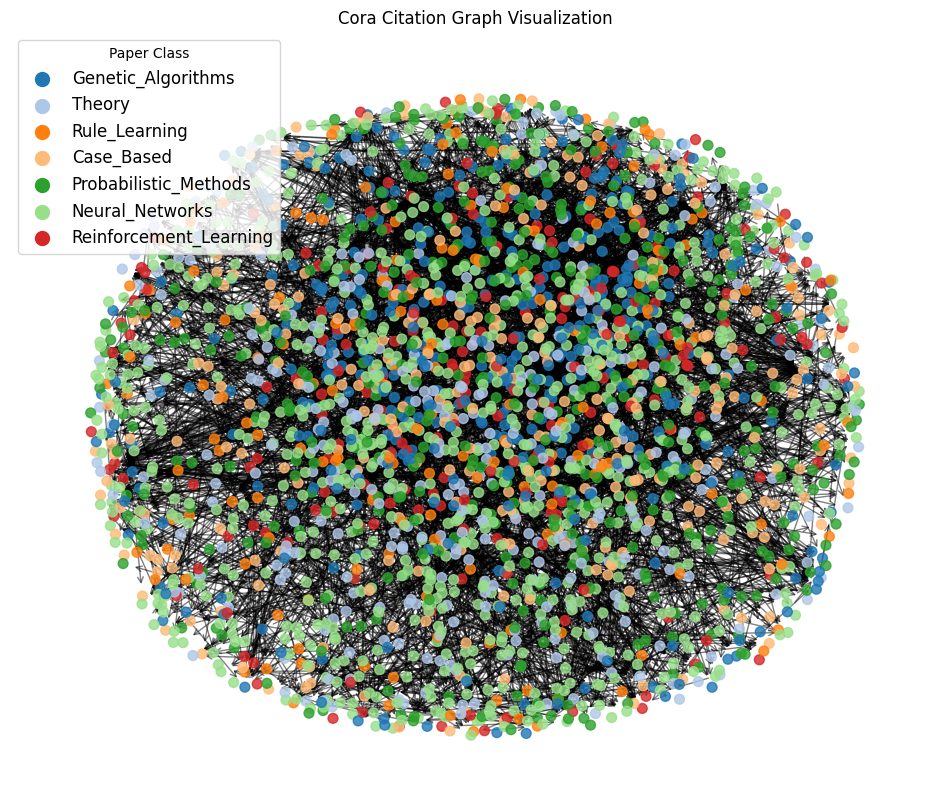

In [ ]:
import matplotlib.pyplot as plt

# Create a color map for labels
labels = nx.get_node_attributes(G, 'label')
unique_labels = list(set(labels.values()))
color_map = {label: plt.cm.tab20(i) for i, label in enumerate(unique_labels)}

# Assign colors to nodes based on their label
node_colors = [color_map[labels[node]] if node in labels else (0.7,0.7,0.7) for node in G.nodes()]

# Use spring layout for better visualization
pos = nx.spring_layout(G, seed=42, k=0.15)

plt.figure(figsize=(12, 10))
nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=50, alpha=0.8)

# Draw edges with arrows
nx.draw_networkx_edges(G, pos, arrowstyle='->', arrowsize=10, alpha=0.5)

# Draw legend for node labels
for label in unique_labels:
    plt.scatter([], [], c=[color_map[label]], label=label, s=100)
plt.legend(scatterpoints=1, fontsize=12, title="Paper Class")

plt.title("Cora Citation Graph Visualization")
plt.axis('off')
plt.show()


* Co-Citation: Two papers A and B are co-cited if they are both cited by the same paper(s).

* Bibliographic Coupling: Two papers A and B are bibliographically coupled if they cite the same paper(s).




In [ ]:
import networkx as nx
from collections import defaultdict

# --- Co-Citation Graph Construction ---
# Edge from paper X to paper Y means X cites Y

def build_co_citation_graph(G):
    co_citation = defaultdict(lambda: 0)

    # Iterate over all papers
    for citing_paper in G.nodes:
        cited_papers = list(G.successors(citing_paper))

        # For each pair of cited papers, increase co-citation count
        for i in range(len(cited_papers)):
            for j in range(i + 1, len(cited_papers)):
                a, b = sorted([cited_papers[i], cited_papers[j]])
                co_citation[(a, b)] += 1

    # Build undirected co-citation graph
    G_co = nx.Graph()
    for (u, v), weight in co_citation.items():
        G_co.add_edge(u, v, weight=weight)

    return G_co


# --- Bibliographic Coupling Graph Construction ---

def build_bibliographic_coupling_graph(G):
    biblio_coupling = defaultdict(lambda: 0)

    # Get list of cited papers per node
    citing_dict = {n: set(G.successors(n)) for n in G.nodes}

    papers = list(G.nodes)
    for i in range(len(papers)):
        for j in range(i + 1, len(papers)):
            a, b = papers[i], papers[j]
            common = citing_dict[a] & citing_dict[b]
            if common:
                biblio_coupling[(a, b)] = len(common)

    # Build undirected bibliographic coupling graph
    G_biblio = nx.Graph()
    for (u, v), weight in biblio_coupling.items():
        G_biblio.add_edge(u, v, weight=weight)

    return G_biblio


In [ ]:
import networkx as nx
from collections import defaultdict

# --- Co-Citation Graph Construction ---
# Edge from paper X to paper Y means X cites Y

def build_co_citation_graph(G):
    """
    Builds a co-citation graph from a directed citation graph.

    In a co-citation graph, an edge exists between two papers if they are both
    cited by the same paper. The weight of the edge is the number of times
    they are co-cited.

    Args:
        G (nx.DiGraph): The input directed citation graph. Nodes represent papers
                        and edges represent citations (source -> target means source cites target).

    Returns:
        nx.Graph: The undirected co-citation graph.
    """
    # Initialize a dictionary to store co-citation counts for pairs of papers.
    # Using defaultdict with a default value of 0 simplifies incrementing counts.
    co_citation = defaultdict(lambda: 0)

    # Iterate over all papers in the original citation graph.
    for citing_paper in G.nodes:
        # Get the list of papers that the current citing paper cites (its successors).
        cited_papers = list(G.successors(citing_paper))

        # Iterate through all unique pairs of cited papers by the current citing paper.
        # This finds pairs of papers that are co-cited by the same source.
        for i in range(len(cited_papers)):
            for j in range(i + 1, len(cited_papers)):
                # Sort the pair of papers to ensure consistent ordering for the dictionary key
                # (e.g., (paper1, paper2) is treated the same as (paper2, paper1)).
                a, b = sorted([cited_papers[i], cited_papers[j]])
                # Increment the co-citation count for this pair.
                co_citation[(a, b)] += 1

    # Build an undirected graph to represent the co-citations.
    G_co = nx.Graph()
    # Add edges to the co-citation graph based on the calculated counts.
    for (u, v), weight in co_citation.items():
        # Add an edge between papers u and v with the weight representing their co-citation frequency.
        G_co.add_edge(u, v, weight=weight)

    # Return the constructed co-citation graph.
    return G_co


# --- Bibliographic Coupling Graph Construction ---

def build_bibliographic_coupling_graph(G):
    """
    Builds a bibliographic coupling graph from a directed citation graph.

    In a bibliographic coupling graph, an edge exists between two papers if
    they cite the same paper(s). The weight of the edge is the number of
    common cited papers.

    Args:
        G (nx.DiGraph): The input directed citation graph. Nodes represent papers
                        and edges represent citations (source -> target means source cites target).

    Returns:
        nx.Graph: The undirected bibliographic coupling graph.
    """
    # Initialize a dictionary to store bibliographic coupling counts for pairs of papers.
    biblio_coupling = defaultdict(lambda: 0)

    # Create a dictionary where keys are paper IDs and values are sets of papers
    # that each paper cites (its successors). Using sets allows for efficient
    # finding of common cited papers.
    citing_dict = {n: set(G.successors(n)) for n in G.nodes}

    # Get a list of all paper IDs in the graph.
    papers = list(G.nodes)
    # Iterate through all unique pairs of papers.
    for i in range(len(papers)):
        for j in range(i + 1, len(papers)):
            a, b = papers[i], papers[j]

            # Find the common papers cited by both paper 'a' and paper 'b'
            # using set intersection.
            common = citing_dict[a] & citing_dict[b]

            # If there are common cited papers, record the count.
            if common:
                # The weight of the edge is the number of common cited papers.
                biblio_coupling[(a, b)] = len(common)

    # Build an undirected graph to represent the bibliographic coupling.
    G_biblio = nx.Graph()
    # Add edges to the bibliographic coupling graph based on the calculated counts.
    for (u, v), weight in biblio_coupling.items():
        # Add an edge between papers u and v with the weight representing their
        # number of shared references.
        G_biblio.add_edge(u, v, weight=weight)

    # Return the constructed bibliographic coupling graph.
    return G_biblio

In [ ]:
# G is your original citation graph (directed)
G_co = build_co_citation_graph(G)
G_biblio = build_bibliographic_coupling_graph(G)

print(f"Co-Citation Graph: {G_co.number_of_nodes()} nodes, {G_co.number_of_edges()} edges")
print(f"Bibliographic Coupling Graph: {G_biblio.number_of_nodes()} nodes, {G_biblio.number_of_edges()} edges")


Co-Citation Graph: 1434 nodes, 4256 edges
Bibliographic Coupling Graph: 2094 nodes, 36881 edges


###Which pairs of papers are most frequently co-cited?

In [ ]:
# Sort edges in co-citation graph by weight (descending)
top_k = 10
top_co_cited_pairs = sorted(G_co.edges(data=True), key=lambda x: x[2]['weight'], reverse=True)[:top_k]

print(f" Top {top_k} Most Frequently Co-Cited Paper Pairs:")
for u, v, data in top_co_cited_pairs:
    print(f"Paper {u} and Paper {v} are co-cited {data['weight']} times")


 Top 10 Most Frequently Co-Cited Paper Pairs:
Paper 6213 and Paper 114 are co-cited 20 times
Paper 35 and Paper 82920 are co-cited 15 times
Paper 6213 and Paper 4584 are co-cited 13 times
Paper 35 and Paper 85352 are co-cited 12 times
Paper 19621 and Paper 1365 are co-cited 12 times
Paper 2665 and Paper 2658 are co-cited 12 times
Paper 3229 and Paper 1365 are co-cited 11 times
Paper 887 and Paper 6213 are co-cited 11 times
Paper 2665 and Paper 230879 are co-cited 11 times
Paper 35 and Paper 1688 are co-cited 10 times


Lets Build a new graph from top co-cited pairs only.

* Node size reflects how many connections (co-citations) they have.

* Edge thickness proportional to co-citation frequency.

* Labels edges with co-citation weights.

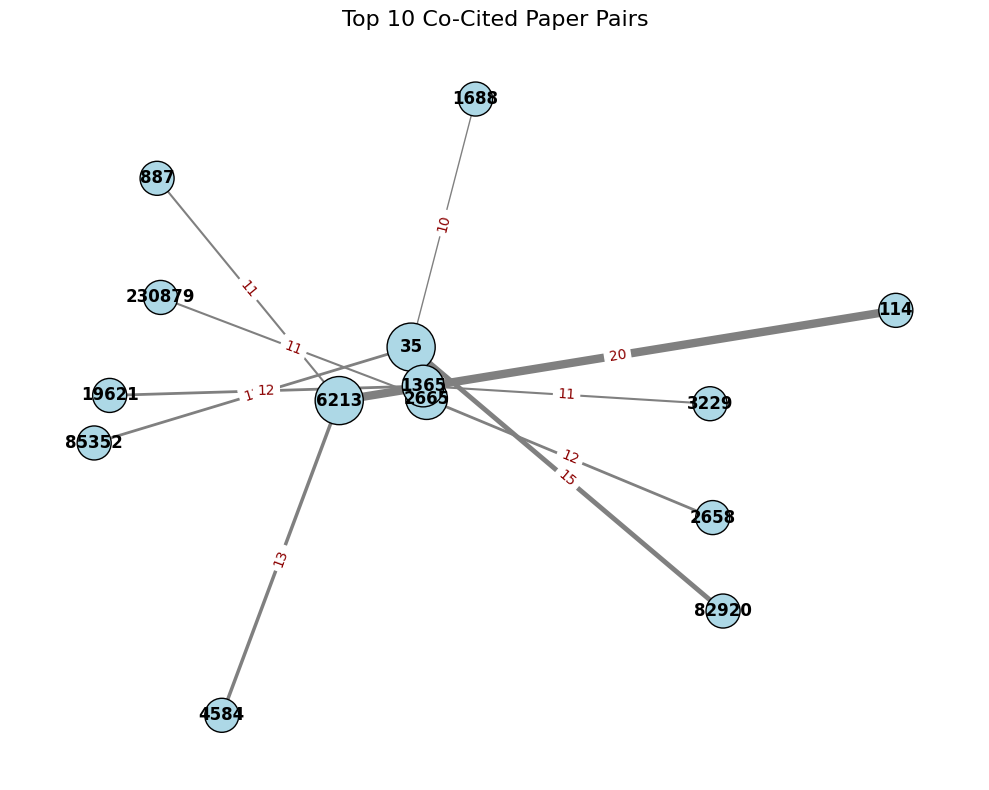

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

# Extract nodes involved in top co-cited pairs
top_edges = top_co_cited_pairs
nodes_in_top = set()
for u, v, data in top_edges:
    nodes_in_top.add(u)
    nodes_in_top.add(v)

# Create a new graph with these nodes and edges
G_top_co = nx.Graph()
G_top_co.add_nodes_from(nodes_in_top)
G_top_co.add_weighted_edges_from([(u, v, data['weight']) for u, v, data in top_edges])

# Define layout for visualization
plt.figure(figsize=(10, 8))
pos = nx.kamada_kawai_layout(G_top_co)

# Node sizes scaled by degree
degrees = dict(G_top_co.degree())
node_sizes = [300 + degrees[n] * 300 for n in G_top_co.nodes()]

# Normalize edge weights for widths
weights = np.array([edata['weight'] for _, _, edata in G_top_co.edges(data=True)])
norm_weights = 1 + 5 * (weights - weights.min()) / (weights.max() - weights.min())

# Draw nodes
nx.draw_networkx_nodes(G_top_co, pos, node_color='lightblue', node_size=node_sizes, edgecolors='black')

# Draw edges
nx.draw_networkx_edges(G_top_co, pos, width=norm_weights, edge_color='gray')

# Draw labels
nx.draw_networkx_labels(G_top_co, pos, font_size=12, font_weight='bold')

# Draw edge labels
edge_labels = {(u, v): d['weight'] for u, v, d in G_top_co.edges(data=True)}
nx.draw_networkx_edge_labels(G_top_co, pos, edge_labels=edge_labels, font_color='darkred', font_size=10)

plt.title(f"Top {top_k} Co-Cited Paper Pairs", fontsize=16)
plt.axis('off')
plt.tight_layout()
plt.show()


 ### Which paper is most frequently co-cited with others?

 We want to find the node (paper) in the co-citation graph (G_co) that is involved in the most or strongest co-citations — i.e., the node with the highest total edge weight (sum of co-citations with all others).

In [ ]:
# Compute total co-citations for each paper
co_cited_counts = {node: sum(weight for _, _, weight in G_co.edges(node, data="weight"))
                   for node in G_co.nodes}

# Find the paper with the highest total co-citation count
most_co_cited_paper = max(co_cited_counts, key=co_cited_counts.get)
max_value = co_cited_counts[most_co_cited_paper]

print(f" Paper {most_co_cited_paper} is most frequently co-cited with others ({max_value} times in total).")


 Paper 35 is most frequently co-cited with others (306 times in total).


This paper is commonly grouped with many others in citations, indicating it's likely a highly influential or foundational paper in the domain.

###Which pairs of papers have the highest bibliographic coupling?

Interpretation: These papers share many citations, so they likely cover similar topics or problems.

In [ ]:
# Sort edges in bibliographic coupling graph by weight descending
top_k = 10
top_bib_coupled = sorted(G_biblio.edges(data="weight"), key=lambda x: x[2], reverse=True)[:top_k]

print(f" Top {top_k} Most Strongly Bibliographically Coupled Paper Pairs:")
for u, v, w in top_bib_coupled:
    print(f"Paper {u} and Paper {v} share {w} common references")


 Top 10 Most Strongly Bibliographically Coupled Paper Pairs:
Paper 1104999 and Paper 63832 share 5 common references
Paper 1154123 and Paper 1154124 share 5 common references
Paper 1128453 and Paper 801170 share 4 common references
Paper 1152421 and Paper 1153280 share 4 common references
Paper 1152421 and Paper 1154459 share 4 common references
Paper 1153280 and Paper 1154459 share 4 common references
Paper 289780 and Paper 801170 share 4 common references
Paper 1152277 and Paper 1152673 share 4 common references
Paper 1152277 and Paper 1154251 share 4 common references
Paper 1152673 and Paper 1154251 share 4 common references


Lets build a graph with only the top bibliographically coupled paper pairs.

Visualize nodes (papers) and edges weighted by the number of shared citations.

Edge thickness are proportional to coupling strength for easy interpretation.

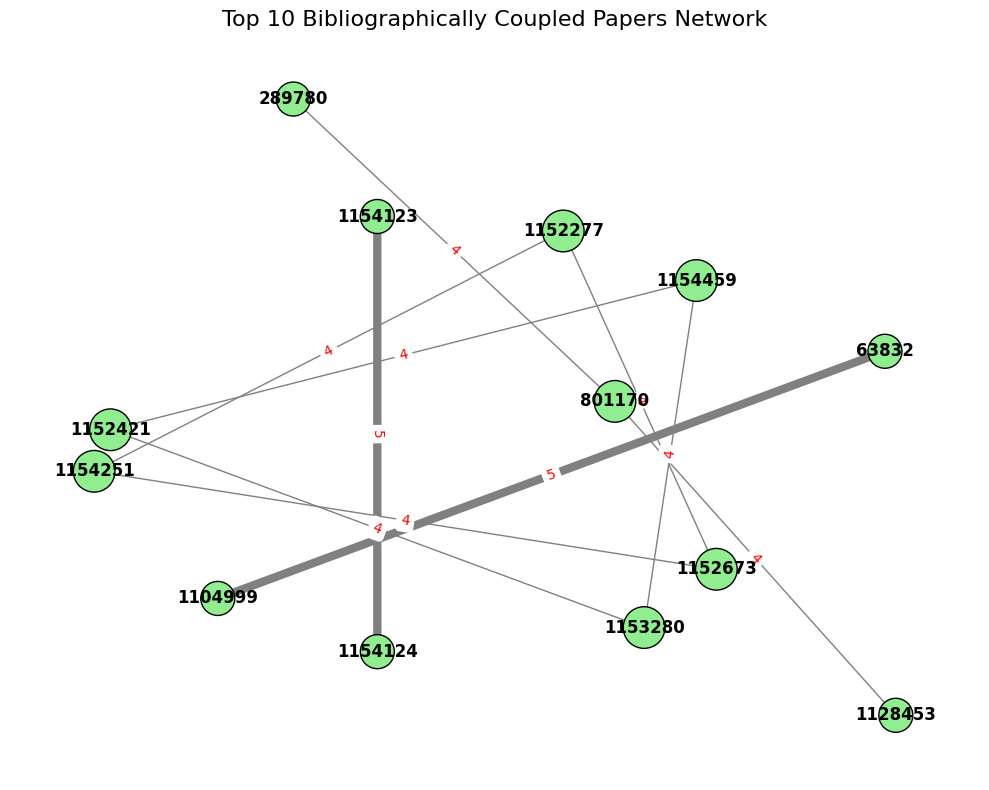

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

# Extract nodes involved in top pairs
top_edges = top_bib_coupled
nodes_in_top = set()
for u, v, w in top_edges:
    nodes_in_top.add(u)
    nodes_in_top.add(v)

# Create a new graph with these nodes and edges
G_top_biblio = nx.Graph()
G_top_biblio.add_nodes_from(nodes_in_top)
G_top_biblio.add_weighted_edges_from([(u, v, w) for u, v, w in top_edges])

plt.figure(figsize=(10, 8))

# Use Kamada-Kawai layout for better spacing
pos = nx.kamada_kawai_layout(G_top_biblio)

# Node sizes scaled by degree (number of edges)
degrees = dict(G_top_biblio.degree())
node_sizes = [300 + degrees[n] * 300 for n in G_top_biblio.nodes()]

# Normalize edge weights for widths (scale between 1 and 6)
weights = np.array([edata['weight'] for _, _, edata in G_top_biblio.edges(data=True)])
norm_weights = 1 + 5 * (weights - weights.min()) / (weights.max() - weights.min())

# Draw nodes
nx.draw_networkx_nodes(G_top_biblio, pos, node_color='lightgreen', node_size=node_sizes, edgecolors='black')

# Draw edges
nx.draw_networkx_edges(G_top_biblio, pos, width=norm_weights, edge_color='gray')

# Draw labels
nx.draw_networkx_labels(G_top_biblio, pos, font_size=12, font_weight='bold')

# Draw edge labels (weights)
edge_labels = {(u, v): d['weight'] for u, v, d in G_top_biblio.edges(data=True)}
nx.draw_networkx_edge_labels(G_top_biblio, pos, edge_labels=edge_labels, font_color='red', font_size=10)

plt.title(f"Top {top_k} Bibliographically Coupled Papers Network", fontsize=16)
plt.axis('off')
plt.tight_layout()
plt.show()
